In [1]:
# Analysis

# Observed Trend 1 - Total Volume Change & % Volume Change
# Over the 45 day treatment, Capomulin was the only treatment that showed the total volume decreasing.   
# The total volume of the cancer for Infubinol, Ketapril and Placebo increased over the 45 day treatment.
# These two observations can be seen in both the total volume plot and the %Volume change bar plot.  

# Observed Trend 2 - # of Metastatic Sites
# The number of metastic sites increased over the 45 days for all 4 drugs.  Capomulin had the largest increase in
# total number of metastatic sites. 

# Observed Trend 3 - Survival 
# Over the 45 day treatment, Capomulin had the highest survival rate compared to the other three treatments.  The 
# survival rate for the other 3 drugs over the 45 day treatment followed a similar decreasing trend.  

In [2]:
%matplotlib notebook

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb

plt.ioff() 

In [4]:
data_csv = "Resources/clinicaltrial_data.csv"
mouse_csv = "Resources/mouse_drug_data.csv"

In [5]:
data_df = pd.read_csv(data_csv)
mouse_df = pd.read_csv(mouse_csv)

In [6]:
#verifying data was read in correctly
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
#verifying data was read in correctly
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [8]:
# make one big table & check to see if there are errors
bigtable_df = pd.merge(data_df, mouse_df, on='Mouse ID')

#count how many per drug
bigtable_df['Drug'].value_counts()


Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [9]:
new_bigtable_df = bigtable_df.set_index("Drug")
new_bigtable_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,,
Capomulin,b128,0,45.000000,0
Capomulin,b128,5,45.651331,0
Capomulin,b128,10,43.270852,0
Capomulin,b128,15,43.784893,0
Capomulin,b128,20,42.731552,0


In [10]:
Capomulin_df = new_bigtable_df.loc[['Capomulin'],['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

Mouse_ID = Capomulin_df['Mouse ID']
Mouse_ID = Mouse_ID.value_counts()
Mouse_ID_df = pd.DataFrame(Mouse_ID)
Mouse_ID_df = Mouse_ID_df.reset_index()
Mouse_ID_df = Mouse_ID_df.rename(index=str, columns={ "Mouse ID": "Count"})
Mouse_ID_df['Start Volume'] = 0.0
Mouse_ID_df['Start Met Size'] = 0.0

Capomulin_df= Capomulin_df.reset_index()
    
for i, row in Mouse_ID_df.iterrows():
    value = Mouse_ID_df['index'][i]
    
    for w, row in Capomulin_df.iterrows():
        Q = Capomulin_df['Mouse ID'][w]
        if((Q == value) and (Capomulin_df['Timepoint'][w] == 0)):
            StartVol = Capomulin_df['Tumor Volume (mm3)'][w]
            StartMet = Capomulin_df['Metastatic Sites'][w]
        

    #print(value)
    Mouse_ID_df.at[i,'Start Volume'] = StartVol
    Mouse_ID_df['Start Met Size'] = StartMet

Mouse_ID_df.head()

,index,Count,Start Volume,Start Met Size
0,s710,10,45.0,0
1,v923,10,45.0,0
2,u364,10,45.0,0
3,t565,10,45.0,0
4,b742,10,45.0,0


In [11]:
Capomulin_df['Volume Change'] = 0.0
Capomulin_df['Met. Change'] = 0.0

for i, row in Capomulin_df.iterrows():
    IDValue = Capomulin_df.loc[i,'Mouse ID']
    
    for w, row in Mouse_ID_df.iterrows():
        if Mouse_ID_df.loc[w,'index'] == IDValue:
            StartVolume = Mouse_ID_df.loc[w,'Start Volume']
            StartMet = Mouse_ID_df.loc[w,'Start Met Size'] 
            
    Volume = Capomulin_df.loc[i, 'Tumor Volume (mm3)']
    Met = Capomulin_df.loc[i, 'Metastatic Sites']
    
    Capomulin_df.at[i,'Volume Change'] = Volume - StartVolume
    Capomulin_df.at[i,'Met. Change'] = Met - StartMet
    
Capomulin_df.head()

,Drug,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Volume Change,Met. Change
0,Capomulin,b128,0,45.000000,0,0.000000,0.0
1,Capomulin,b128,5,45.651331,0,0.651331,0.0
2,Capomulin,b128,10,43.270852,0,-1.729148,0.0
3,Capomulin,b128,15,43.784893,0,-1.215107,0.0
4,Capomulin,b128,20,42.731552,0,-2.268448,0.0


In [12]:
C_Vol_Change = Capomulin_df.loc[:,['Timepoint', 'Volume Change']]
C_Vol_Change=C_Vol_Change.set_index("Timepoint")
C_Vol_Change=C_Vol_Change.reset_index()

C_Vol_Change_df = C_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].mean()
C_SEM_test = C_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].sem()

test = C_SEM_test.loc[:, 'Volume Change']
C_Vol_Change_df['SEM']=test
C_Vol_Change_df.head(10)

,Timepoint,Volume Change,SEM
0,0,0.000000,0.000000
1,5,-0.733914,0.448593
2,10,-1.915709,0.702684
3,15,-2.935683,0.838617
4,20,-4.283675,0.909731
5,25,-5.060472,0.881642
6,30,-6.230661,0.934460
7,35,-7.183161,1.052241
8,40,-8.041999,1.223608
9,45,-8.763886,1.223977


In [13]:
C_Met_Change = Capomulin_df.loc[:,['Timepoint', 'Met. Change']]
C_Met_Change=C_Met_Change.set_index("Timepoint")
C_Met_Change=C_Met_Change.reset_index()

C_Met_Change_df = C_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].mean()
C_SEM_test = C_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].sem()

test = C_SEM_test.loc[:, 'Met. Change']
C_Met_Change_df['SEM']=test
C_Met_Change_df.head(10)

,Timepoint,Met. Change,SEM
0,0,0.000000,0.000000
1,5,0.160000,0.074833
2,10,0.320000,0.125433
3,15,0.375000,0.132048
4,20,0.652174,0.161621
5,25,0.818182,0.181818
6,30,1.090909,0.172944
7,35,1.181818,0.169496
8,40,1.380952,0.175610
9,45,1.476190,0.202591


In [14]:
C_Mouse_Alive = Capomulin_df.loc[:,['Mouse ID', 'Timepoint']]

C_Mouse_Alive=C_Mouse_Alive.set_index("Timepoint")
C_Mouse_Alive=C_Mouse_Alive.reset_index()

Count = C_Mouse_Alive['Timepoint'].value_counts()

C_Alive_Days_df = pd.DataFrame(Count)
C_Alive_Days_df = C_Alive_Days_df.reset_index()
C_Alive_Days_df = C_Alive_Days_df.sort_values(by='index', ascending = True)

#Shows count of mouse for each day.  
C_Alive_Days_df.head(10)


,index,Timepoint
2,0,25
1,5,25
0,10,25
3,15,24
4,20,23
7,25,22
6,30,22
5,35,22
9,40,21
8,45,21


In [15]:
I_df = new_bigtable_df.loc[['Infubinol'],['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

I_Mouse_ID = I_df['Mouse ID']
I_Mouse_ID = I_Mouse_ID.value_counts()
I_Mouse_ID_df = pd.DataFrame(I_Mouse_ID)
I_Mouse_ID_df = I_Mouse_ID_df.reset_index()
I_Mouse_ID_df = I_Mouse_ID_df.rename(index=str, columns={ "Mouse ID": "Count"})
I_Mouse_ID_df['Start Volume'] = 0.0
I_Mouse_ID_df['Start Met Size'] = 0.0

I_df = I_df.reset_index()

for i, row in I_Mouse_ID_df.iterrows():
    value = I_Mouse_ID_df['index'][i]
    
    for w, row in I_df.iterrows():
        Q = I_df['Mouse ID'][w]
        if((Q == value) and (I_df['Timepoint'][w] == 0)):
            StartVol = I_df['Tumor Volume (mm3)'][w]
            StartMet = I_df['Metastatic Sites'][w]
        

    #print(value)
    I_Mouse_ID_df.at[i,'Start Volume'] = StartVol
    I_Mouse_ID_df['Start Met Size'] = StartMet

I_Mouse_ID_df.head()

,index,Count,Start Volume,Start Met Size
0,c139,10,45.0,0
1,z581,10,45.0,0
2,a203,10,45.0,0
3,a251,10,45.0,0
4,a685,10,45.0,0


In [16]:
I_df['Volume Change'] = 0.0
I_df['Met. Change'] = 0.0

for i, row in I_df.iterrows():
    IDValue = I_df.loc[i,'Mouse ID']
    
    for w, row in I_Mouse_ID_df.iterrows():
        if I_Mouse_ID_df.loc[w,'index'] == IDValue:
            StartVolume = I_Mouse_ID_df.loc[w,'Start Volume']
            StartMet = I_Mouse_ID_df.loc[w,'Start Met Size'] 
            
    Volume = I_df.loc[i, 'Tumor Volume (mm3)']
    Met = I_df.loc[i, 'Metastatic Sites']
    
    I_df.at[i,'Volume Change'] = Volume - StartVolume
    I_df.at[i,'Met. Change'] = Met - StartMet
    
I_df.head()

,Drug,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Volume Change,Met. Change
0,Infubinol,c326,0,45.000000,0,0.000000,0.0
1,Infubinol,c326,5,49.340203,0,4.340203,0.0
2,Infubinol,c139,0,45.000000,0,0.000000,0.0
3,Infubinol,c139,5,48.753112,0,3.753112,0.0
4,Infubinol,c139,10,49.992954,0,4.992954,0.0


In [17]:
I_Vol_Change = I_df.loc[:,['Timepoint', 'Volume Change']]
I_Vol_Change=I_Vol_Change.set_index("Timepoint")
I_Vol_Change=I_Vol_Change.reset_index()

I_Vol_Change_df = I_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].mean()
I_SEM_test = I_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].sem()

test = I_SEM_test.loc[:, 'Volume Change']
I_Vol_Change_df['SEM']=test
I_Vol_Change_df.head(10)

,Timepoint,Volume Change,SEM
0,0,0.000000,0.000000
1,5,2.062001,0.235102
2,10,4.403909,0.282346
3,15,6.296397,0.357705
4,20,8.197691,0.476210
5,25,10.715252,0.550315
6,30,13.299397,0.631061
7,35,15.742461,0.984155
8,40,18.162824,1.055220
9,45,20.755562,1.144427


In [18]:
I_Met_Change = I_df.loc[:,['Timepoint', 'Met. Change']]
I_Met_Change=I_Met_Change.set_index("Timepoint")
I_Met_Change=I_Met_Change.reset_index()

I_Met_Change_df = I_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].mean()
I_SEM_test = I_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].sem()

test = I_SEM_test.loc[:, 'Met. Change']
I_Met_Change_df['SEM']=test
I_Met_Change_df.head(10)

,Timepoint,Met. Change,SEM
0,0,0.000000,0.000000
1,5,0.280000,0.091652
2,10,0.666667,0.159364
3,15,0.904762,0.194015
4,20,1.050000,0.234801
5,25,1.277778,0.265753
6,30,1.588235,0.227823
7,35,1.666667,0.224733
8,40,2.100000,0.314466
9,45,2.111111,0.309320


In [19]:
I_Mouse_Alive = I_df.loc[:,['Mouse ID', 'Timepoint']]

I_Mouse_Alive=I_Mouse_Alive.set_index("Timepoint")
I_Mouse_Alive=I_Mouse_Alive.reset_index()

Count = I_Mouse_Alive['Timepoint'].value_counts()

I_Alive_Days_df = pd.DataFrame(Count)
I_Alive_Days_df = I_Alive_Days_df.reset_index()
I_Alive_Days_df = I_Alive_Days_df.sort_values(by='index', ascending = True)
I_Alive_Days_df.head(10)

,index,Timepoint
1,0,25
0,5,25
3,10,21
2,15,21
4,20,20
5,25,18
6,30,17
7,35,12
8,40,10
9,45,9


In [20]:
K_df = new_bigtable_df.loc[['Ketapril'],['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

K_Mouse_ID = K_df['Mouse ID']
K_Mouse_ID = K_Mouse_ID.value_counts()
K_Mouse_ID_df = pd.DataFrame(K_Mouse_ID)
K_Mouse_ID_df = K_Mouse_ID_df.reset_index()
K_Mouse_ID_df = K_Mouse_ID_df.rename(index=str, columns={ "Mouse ID": "Count"})
K_Mouse_ID_df['Start Volume'] = 0.0
K_Mouse_ID_df['Start Met Size'] = 0.0

K_df = K_df.reset_index()

for i, row in K_Mouse_ID_df.iterrows():
    value = K_Mouse_ID_df['index'][i]
    
    for w, row in K_df.iterrows():
        Q = K_df['Mouse ID'][w]
        if((Q == value) and (K_df['Timepoint'][w] == 0)):
            StartVol = K_df['Tumor Volume (mm3)'][w]
            StartMet = K_df['Metastatic Sites'][w]
        

    #print(value)
    K_Mouse_ID_df.at[i,'Start Volume'] = StartVol
    K_Mouse_ID_df['Start Met Size'] = StartMet

K_Mouse_ID_df.head()

,index,Count,Start Volume,Start Met Size
0,k382,10,45.0,0
1,y260,10,45.0,0
2,g497,10,45.0,0
3,u327,10,45.0,0
4,p189,10,45.0,0


In [21]:
K_df['Volume Change'] = 0.0
K_df['Met. Change'] = 0.0

for i, row in K_df.iterrows():
    IDValue = K_df.loc[i,'Mouse ID']
    
    for w, row in K_Mouse_ID_df.iterrows():
        if K_Mouse_ID_df.loc[w,'index'] == IDValue:
            StartVolume = K_Mouse_ID_df.loc[w,'Start Volume']
            StartMet = K_Mouse_ID_df.loc[w,'Start Met Size'] 
            
    Volume = K_df.loc[i, 'Tumor Volume (mm3)']
    Met = K_df.loc[i, 'Metastatic Sites']
    
    K_df.at[i,'Volume Change'] = Volume - StartVolume
    K_df.at[i,'Met. Change'] = Met - StartMet
    
K_df.head()

,Drug,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Volume Change,Met. Change
0,Ketapril,f932,0,45.000000,0,0.000000,0.0
1,Ketapril,g107,0,45.000000,0,0.000000,0.0
2,Ketapril,g107,5,48.791665,0,3.791665,0.0
3,Ketapril,g107,10,53.435987,0,8.435987,0.0
4,Ketapril,g107,15,58.135545,0,13.135545,0.0


In [22]:
K_Vol_Change = K_df.loc[:,['Timepoint', 'Volume Change']]
K_Vol_Change=K_Vol_Change.set_index("Timepoint")
K_Vol_Change=K_Vol_Change.reset_index()

K_Vol_Change_df = K_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].mean()
K_SEM_test = K_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].sem()

test = K_SEM_test.loc[:, 'Volume Change']
K_Vol_Change_df['SEM']=test
K_Vol_Change_df.head(10)

,Timepoint,Volume Change,SEM
0,0,0.000000,0.000000
1,5,2.389175,0.264819
2,10,4.582269,0.357421
3,15,7.399974,0.580268
4,20,9.920935,0.726484
5,25,12.678982,0.755413
6,30,15.994507,0.934121
7,35,18.371686,1.127867
8,40,21.068580,1.158449
9,45,25.662958,1.453186


In [23]:
K_Met_Change = K_df.loc[:,['Timepoint', 'Met. Change']]
K_Met_Change=K_Met_Change.set_index("Timepoint")
K_Met_Change=K_Met_Change.reset_index()

K_Met_Change_df = K_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].mean()
K_SEM_test = K_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].sem()

test = K_SEM_test.loc[:, 'Met. Change']
K_Met_Change_df['SEM']=test
K_Met_Change_df.head(10)

,Timepoint,Met. Change,SEM
0,0,0.000000,0.000000
1,5,0.304348,0.098100
2,10,0.590909,0.142018
3,15,0.842105,0.191381
4,20,1.210526,0.236680
5,25,1.631579,0.288275
6,30,2.055556,0.347467
7,35,2.294118,0.361418
8,40,2.733333,0.315725
9,45,3.363636,0.278722


In [24]:
K_Mouse_Alive = K_df.loc[:,['Mouse ID', 'Timepoint']]

K_Mouse_Alive=K_Mouse_Alive.set_index("Timepoint")
K_Mouse_Alive=K_Mouse_Alive.reset_index()

Count = K_Mouse_Alive['Timepoint'].value_counts()

K_Alive_Days_df = pd.DataFrame(Count)
K_Alive_Days_df = K_Alive_Days_df.reset_index()
K_Alive_Days_df = K_Alive_Days_df.sort_values(by='index', ascending = True)
K_Alive_Days_df.head(10)

,index,Timepoint
0,0,25
1,5,23
2,10,22
5,15,19
4,20,19
3,25,19
6,30,18
7,35,17
8,40,15
9,45,11


In [25]:
P_df = new_bigtable_df.loc[['Placebo'],['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

P_Mouse_ID = P_df['Mouse ID']
P_Mouse_ID = P_Mouse_ID.value_counts()
P_Mouse_ID_df = pd.DataFrame(P_Mouse_ID)
P_Mouse_ID_df = P_Mouse_ID_df.reset_index()
P_Mouse_ID_df = P_Mouse_ID_df.rename(index=str, columns={ "Mouse ID": "Count"})
P_Mouse_ID_df['Start Volume'] = 0.0
P_Mouse_ID_df['Start Met Size'] = 0.0

P_df = P_df.reset_index()

for i, row in P_Mouse_ID_df.iterrows():
    value = P_Mouse_ID_df['index'][i]
    
    for w, row in P_df.iterrows():
        Q = P_df['Mouse ID'][w]
        if((Q == value) and (P_df['Timepoint'][w] == 0)):
            StartVol = P_df['Tumor Volume (mm3)'][w]
            StartMet = P_df['Metastatic Sites'][w]
        

    #print(value)
    P_Mouse_ID_df.at[i,'Start Volume'] = StartVol
    P_Mouse_ID_df['Start Met Size'] = StartMet

P_Mouse_ID_df.head()

,index,Count,Start Volume,Start Met Size
0,c282,10,45.0,0
1,q787,10,45.0,0
2,a897,10,45.0,0
3,o795,10,45.0,0
4,y478,10,45.0,0


In [26]:
P_df['Volume Change'] = 0.0
P_df['Met. Change'] = 0.0

for i, row in P_df.iterrows():
    IDValue = P_df.loc[i,'Mouse ID']
    
    for w, row in P_Mouse_ID_df.iterrows():
        if P_Mouse_ID_df.loc[w,'index'] == IDValue:
            StartVolume = P_Mouse_ID_df.loc[w,'Start Volume']
            StartMet = P_Mouse_ID_df.loc[w,'Start Met Size'] 
            
    Volume = P_df.loc[i, 'Tumor Volume (mm3)']
    Met = P_df.loc[i, 'Metastatic Sites']
    
    P_df.at[i,'Volume Change'] = Volume - StartVolume
    P_df.at[i,'Met. Change'] = Met - StartMet
    
P_df.head()

,Drug,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Volume Change,Met. Change
0,Placebo,a897,0,45.000000,0,0.000000,0.0
1,Placebo,a897,5,45.691124,1,0.691124,1.0
2,Placebo,a897,10,47.972927,1,2.972927,1.0
3,Placebo,a897,15,52.343085,2,7.343085,2.0
4,Placebo,a897,20,54.595705,3,9.595705,3.0


In [27]:
P_Vol_Change = P_df.loc[:,['Timepoint', 'Volume Change']]
P_Vol_Change=P_Vol_Change.set_index("Timepoint")
P_Vol_Change=P_Vol_Change.reset_index()

P_Vol_Change_df = P_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].mean()
P_SEM_test = P_Vol_Change.groupby('Timepoint', as_index=False)['Volume Change'].sem()

test = P_SEM_test.loc[:, 'Volume Change']
P_Vol_Change_df['SEM']=test
P_Vol_Change_df.head(10)

,Timepoint,Volume Change,SEM
0,0,0.000000,0.000000
1,5,2.125589,0.218091
2,10,4.423329,0.402064
3,15,6.359742,0.614461
4,20,9.364417,0.839609
5,25,12.482574,1.034872
6,30,14.809063,1.218231
7,35,17.420615,1.287481
8,40,20.052675,1.370634
9,45,23.084082,1.351726


In [28]:
P_Met_Change = P_df.loc[:,['Timepoint', 'Met. Change']]
P_Met_Change=P_Met_Change.set_index("Timepoint")
P_Met_Change=P_Met_Change.reset_index()

P_Met_Change_df = P_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].mean()
P_SEM_test = P_Met_Change.groupby('Timepoint', as_index=False)['Met. Change'].sem()

test = P_SEM_test.loc[:, 'Met. Change']
P_Met_Change_df['SEM']=test
P_Met_Change_df.head(10)

,Timepoint,Met. Change,SEM
0,0,0.000000,0.000000
1,5,0.375000,0.100947
2,10,0.833333,0.115261
3,15,1.250000,0.190221
4,20,1.526316,0.234064
5,25,1.941176,0.263888
6,30,2.266667,0.300264
7,35,2.642857,0.341412
8,40,3.166667,0.297294
9,45,3.272727,0.304240


In [29]:
P_Mouse_Alive = P_df.loc[:,['Mouse ID', 'Timepoint']]

P_Mouse_Alive=P_Mouse_Alive.set_index("Timepoint")
P_Mouse_Alive=P_Mouse_Alive.reset_index()

Count = P_Mouse_Alive['Timepoint'].value_counts()

P_Alive_Days_df = pd.DataFrame(Count)
P_Alive_Days_df = P_Alive_Days_df.reset_index()
P_Alive_Days_df = P_Alive_Days_df.sort_values(by='index', ascending = True)
P_Alive_Days_df.head(10)

,index,Timepoint
0,0,25
2,5,24
1,10,24
3,15,20
4,20,19
5,25,17
6,30,15
7,35,14
8,40,12
9,45,11


<IPython.core.display.Javascript object>


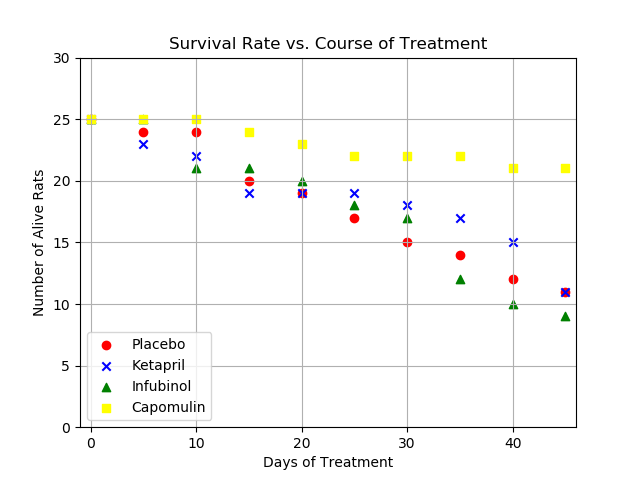

In [38]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
plt.scatter(P_Alive_Days_df['index'],P_Alive_Days_df['Timepoint'], marker="o", facecolors="red",
            edgecolors="red",label="Placebo")
plt.scatter(K_Alive_Days_df['index'],K_Alive_Days_df['Timepoint'], marker="x", facecolors="blue", 
            edgecolors="blue",label="Ketapril")
plt.scatter(I_Alive_Days_df['index'],I_Alive_Days_df['Timepoint'], marker="^", facecolors="green", 
            edgecolors="green",label="Infubinol")
plt.scatter(C_Alive_Days_df['index'],C_Alive_Days_df['Timepoint'], marker="s", facecolors="yellow", 
            edgecolors="yellow",label="Capomulin")

plt.title("Survival Rate vs. Course of Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Number of Alive Rats")

plt.xlim(-1, 46)
plt.ylim(0, 30)

plt.legend(loc="lower left")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


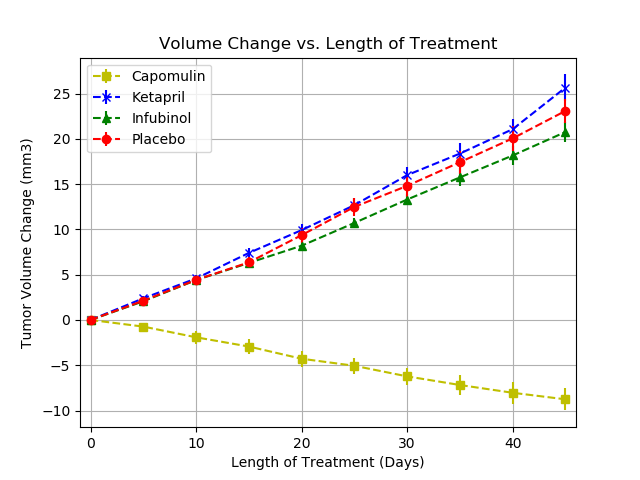

In [31]:
plt.errorbar(C_Vol_Change_df['Timepoint'], C_Vol_Change_df['Volume Change'], yerr=C_Vol_Change_df['SEM'], 
             fmt='ys--',label = 'Capomulin')
plt.errorbar(K_Vol_Change_df['Timepoint'], K_Vol_Change_df['Volume Change'], yerr=K_Vol_Change_df['SEM'], 
             fmt='bx--',label = 'Ketapril')
plt.errorbar(I_Vol_Change_df['Timepoint'], I_Vol_Change_df['Volume Change'], yerr=I_Vol_Change_df['SEM'], 
             fmt='g^--',label = 'Infubinol')
plt.errorbar(P_Vol_Change_df['Timepoint'], P_Vol_Change_df['Volume Change'], yerr=P_Vol_Change_df['SEM'], 
             fmt='ro--',label = 'Placebo')

plt.title("Volume Change vs. Length of Treatment")
plt.xlabel("Length of Treatment (Days)")
plt.ylabel("Tumor Volume Change (mm3)")

plt.xlim(-1, 46)

plt.legend(loc="upper left")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


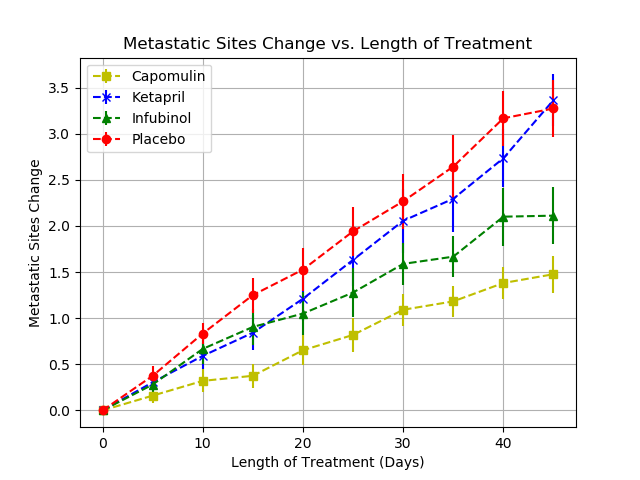

In [32]:
plt.errorbar(C_Met_Change_df['Timepoint'], C_Met_Change_df['Met. Change'], yerr=C_Met_Change_df['SEM'], 
             fmt='ys--',label = 'Capomulin')
plt.errorbar(K_Met_Change_df['Timepoint'], K_Met_Change_df['Met. Change'], yerr=K_Met_Change_df['SEM'], 
             fmt='bx--',label = 'Ketapril')
plt.errorbar(I_Met_Change_df['Timepoint'], I_Met_Change_df['Met. Change'], yerr=I_Met_Change_df['SEM'], 
             fmt='g^--',label = 'Infubinol')
plt.errorbar(P_Met_Change_df['Timepoint'], P_Met_Change_df['Met. Change'], yerr=P_Met_Change_df['SEM'], 
             fmt='ro--',label = 'Placebo')

plt.title("Metastatic Sites Change vs. Length of Treatment")
plt.xlabel("Length of Treatment (Days)")
plt.ylabel("Metastatic Sites Change")

plt.legend(loc="upper left")
plt.grid()
plt.show()

In [33]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

C_Vol_Change = Capomulin_df.loc[:,['Timepoint', 'Tumor Volume (mm3)', 'Volume Change']]
C_Vol_Change=C_Vol_Change.set_index("Timepoint")
C_Vol_Change=C_Vol_Change.reset_index()
C_Vol_Change['Percentage'] = C_Vol_Change['Volume Change']/C_Vol_Change['Tumor Volume (mm3)']
C_Vol_Change_df = C_Vol_Change['Percentage'].sum()

I_Vol_Change = I_df.loc[:,['Timepoint', 'Tumor Volume (mm3)', 'Volume Change']]
I_Vol_Change=I_Vol_Change.set_index("Timepoint")
I_Vol_Change=I_Vol_Change.reset_index()
I_Vol_Change['Percentage'] = I_Vol_Change['Volume Change']/I_Vol_Change['Tumor Volume (mm3)']
I_Vol_Change_df = I_Vol_Change['Percentage'].sum()

K_Vol_Change = K_df.loc[:,['Timepoint', 'Tumor Volume (mm3)', 'Volume Change']]
K_Vol_Change=K_Vol_Change.set_index("Timepoint")
K_Vol_Change=K_Vol_Change.reset_index()
K_Vol_Change['Percentage'] = K_Vol_Change['Volume Change']/K_Vol_Change['Tumor Volume (mm3)']
K_Vol_Change_df = K_Vol_Change['Percentage'].sum()

P_Vol_Change = P_df.loc[:,['Timepoint', 'Tumor Volume (mm3)', 'Volume Change']]
P_Vol_Change=P_Vol_Change.set_index("Timepoint")
P_Vol_Change=P_Vol_Change.reset_index()
P_Vol_Change['Percentage'] = P_Vol_Change['Volume Change']/P_Vol_Change['Tumor Volume (mm3)']
P_Vol_Change_df = P_Vol_Change['Percentage'].sum()


In [34]:
all_data = {'treatment': ['Capomulin', 'Ketapril', 'Infubino', 'Placebo'],
             'Total % Change': [C_Vol_Change_df , I_Vol_Change_df,K_Vol_Change_df, P_Vol_Change_df]}
bar_data_df = pd.DataFrame(all_data)
bar_data_df.head()

,treatment,Total % Change
0,Capomulin,-28.889880
1,Ketapril,24.616346
2,Infubino,31.560232
3,Placebo,27.299305


<IPython.core.display.Javascript object>


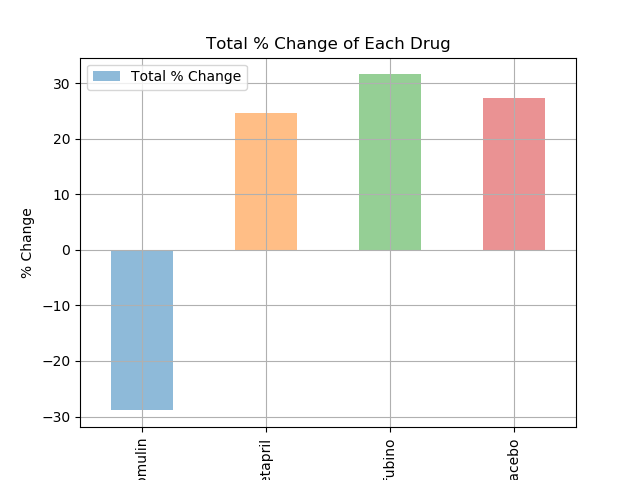

In [35]:
ticks = np.arange(4)

ax = bar_data_df['Total % Change'].plot(kind='bar', title ="Total % Change of Each Drug", legend=True, alpha=0.5)
plt.xticks(ticks, bar_data_df['treatment'])
ax.set_xlabel("Hour")
ax.set_ylabel("% Change")
plt.grid()
plt.show()

#plt.bar(ticks, bar_data_df['Total % Change'], alpha = 0.5)
#plt.xticks(ticks, bar_data_df['treatment'])
#plt.xlabel('Treatment')
#plt.ylabel('% Change')
#plt.title('Total % Change of Each Drug')

#threshold = 0.0
#plt.plot([-0.5,3.5], [threshold, threshold], "k--")
plt.show()

